# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [10]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

c:\Users\georg\OneDrive\Skrivebord\projects-2023-noobs\inauguralproject\HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Relative hours = HF/HM = 3.00/5.50= 0.55 for alpha and sigma (0.25, 0.5)
Relative hours = HF/HM = 2.00/6.50= 0.31 for alpha and sigma (0.25, 1.0)
Relative hours = HF/HM = 1.50/7.00= 0.21 for alpha and sigma (0.25, 1.5)
Relative hours = HF/HM = 4.50/4.50= 1.00 for alpha and sigma (0.5, 0.5)
Relative hours = HF/HM = 4.50/4.50= 1.00 for alpha and sigma (0.5, 1.0)
Relative hours = HF/HM = 4.50/4.50= 1.00 for alpha and sigma (0.5, 1.5)
Relative hours = HF/HM = 5.50/3.00= 1.83 for alpha and sigma (0.75, 0.5)
Relative hours = HF/HM = 6.50/2.00= 3.25 for alpha and sigma (0.75, 1.0)
Relative hours = HF/HM = 7.00/1.50= 4.67 for alpha and sigma (0.75, 1.5)


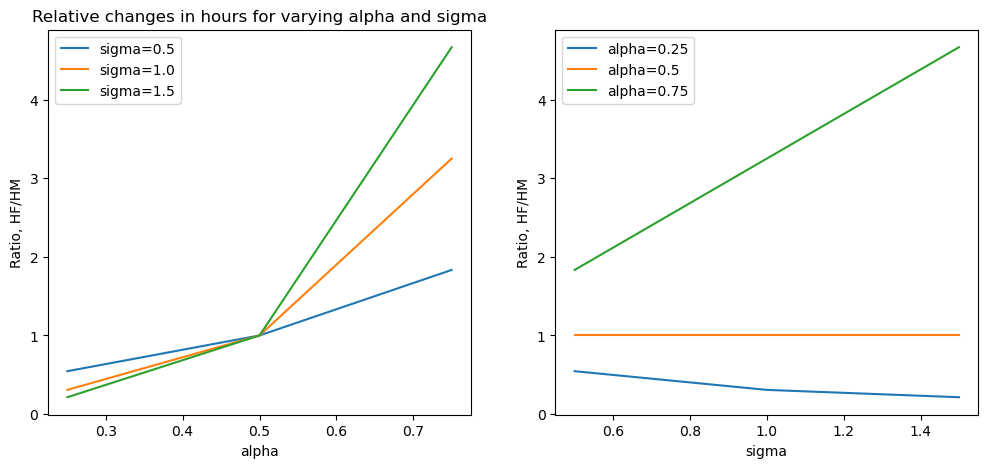

In [32]:
# Create dictionaries
dict_HF = {}
dict_HM = {}
dict_ratio = {}

# Using varying parameters of alpha and sigma
for alpha in [0.25, 0.50, 0.75]:    
    for sigma in [0.5, 1.0, 1.5]:
        # Set new values for alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma

        # solve the model
        dsol = model.solve_discrete()
        # store the result
        dict_HF[(alpha, sigma)] = dsol.HF
        dict_HM[(alpha, sigma)] = dsol.HM
        dict_ratio[(alpha, sigma)] = dsol.HF/dsol.HM

        # print results
        print(f'Relative hours = HF/HM = {dsol.HF:.2f}/{dsol.HM:.2f}= {dsol.HF/dsol.HM:.2f} for alpha and sigma {alpha, sigma}')
                       
# We plot the results
# a. create the figure
fig = plt.figure(figsize=(12,5))# figsize is in inches...

# b. left plot
ax_left = fig.add_subplot(1,2,1)
for sigma in [0.5, 1.0, 1.5]:
    y = [dict_ratio[(alpha, sigma)] for alpha in [0.25, 0.50, 0.75]]
    ax_left.plot([0.25, 0.50, 0.75], y, label=f"sigma={sigma}")
ax_left.set_xlabel("alpha")
ax_left.set_ylabel("Ratio, HF/HM")
ax_left.legend()


# c. right plot
ax_right = fig.add_subplot(1,2,2)
for alpha in [0.25, 0.50, 0.75]:
    y = [dict_ratio[(alpha, sigma)] for sigma in [0.5, 1.0, 1.5]]
    ax_right.plot([0.5, 1.0, 1.5], y, label=f"alpha={alpha}")
ax_right.set_xlabel("sigma")
ax_right.set_ylabel("Ratio, HF/HM")
ax_right.legend()



plt.close(fig) # (Suppress print to fit slides) 
ax_left.set_title("Relative changes in hours for varying alpha and sigma")
fig


We find that the ratio is positively correlated with $\alpha$. And the ratio increases in $\sigma$ when $\alpha$ is high, and decreases in $\sigma$ when $\alpha$ is low.


# Question 2

# Question 3

Explain your code and procedure

In [6]:
# code

ADD CONCISE CONLUSION.